In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

import nnfs.datasets
import nnfs

from sklearn.metrics import confusion_matrix

In [4]:
from model.neural_network import NeuralNetwork

from model.layers.dense import DenseLayer
from model.layers.dropout import DropoutLayer
from model.optimizers.adam import Adam

# Regression Testing

In [6]:
x, y = nnfs.datasets.sine_data()

model = NeuralNetwork([
    DenseLayer(1, 64, activation='Relu'),
    DenseLayer(64, 64, activation='Relu'),
    DenseLayer(64, 1)
])

model.set(
    loss='MeanSquaredError',
    optimizer=Adam(learning_rate=0.005, decay=1e-3)
)

model.train(x, y, epochs=1000)

epoch: 0, loss: 0.500, acc: 0.00%, lr: 0.0050000000
epoch: 100, loss: 0.080, acc: 84.01%, lr: 0.0045495905
epoch: 200, loss: 0.024, acc: 95.23%, lr: 0.0041701418
epoch: 300, loss: 0.001, acc: 99.85%, lr: 0.0038491147
epoch: 400, loss: 0.000, acc: 99.98%, lr: 0.0035739814
epoch: 500, loss: 0.000, acc: 99.99%, lr: 0.0033355570
epoch: 600, loss: 0.000, acc: 99.99%, lr: 0.0031269543
epoch: 700, loss: 0.000, acc: 100.00%, lr: 0.0029429076
epoch: 800, loss: 0.000, acc: 100.00%, lr: 0.0027793218
epoch: 900, loss: 0.000, acc: 99.98%, lr: 0.0026329647
epoch: 1000, loss: 0.000, acc: 100.00%, lr: 0.0025012506


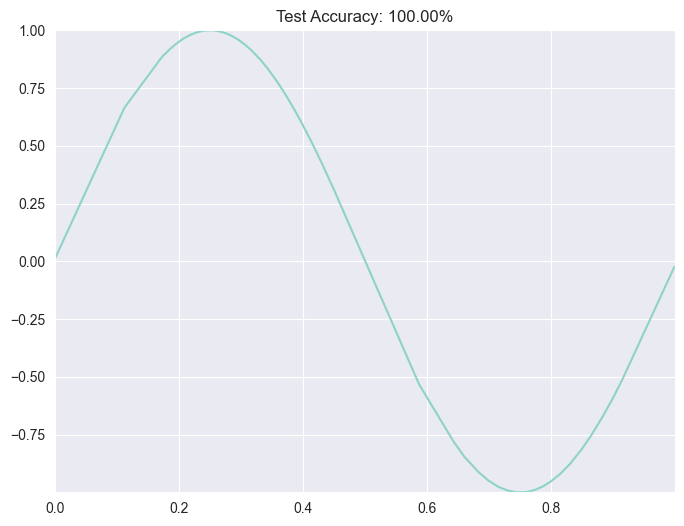

In [12]:
x_test, y_test = nnfs.datasets.sine_data()
accuracy = model.evaluate(x_test, y_test)

outputs = model.forward(x_test)

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
plt.xlim(x_test.min(), x_test.max())
plt.ylim(outputs.min(), outputs.max())
plt.title(f'Test Accuracy: {accuracy:.2f}%')
plt.plot(x_test, outputs)
plt.show()

# Classification Testing

In [21]:
x, y = nnfs.datasets.spiral_data(1000, classes=2)
y = y.reshape(-1, 1)

model = NeuralNetwork([
    DenseLayer(2, 128, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4),
    DropoutLayer(rate=0.01),
    DenseLayer(128, 64, activation='Relu'),
    DropoutLayer(rate=0.01),
    DenseLayer(64, 1, activation='Sigmoid')
])

model.set(
    loss='BinaryCrossentropy',
    optimizer=Adam(decay=5e-7)
)

model.train(x, y, epochs=2000)

epoch: 0, loss: 0.693, acc: 49.25%, lr: 0.0010000000
epoch: 100, loss: 0.658, acc: 60.95%, lr: 0.0009999505
epoch: 200, loss: 0.571, acc: 71.15%, lr: 0.0009999005
epoch: 300, loss: 0.451, acc: 79.30%, lr: 0.0009998505
epoch: 400, loss: 0.367, acc: 86.15%, lr: 0.0009998005
epoch: 500, loss: 0.335, acc: 87.45%, lr: 0.0009997506
epoch: 600, loss: 0.298, acc: 88.35%, lr: 0.0009997006
epoch: 700, loss: 0.277, acc: 91.20%, lr: 0.0009996506
epoch: 800, loss: 0.250, acc: 90.40%, lr: 0.0009996007
epoch: 900, loss: 0.237, acc: 90.90%, lr: 0.0009995507
epoch: 1000, loss: 0.227, acc: 92.40%, lr: 0.0009995007
epoch: 1100, loss: 0.227, acc: 93.25%, lr: 0.0009994508
epoch: 1200, loss: 0.204, acc: 93.05%, lr: 0.0009994009
epoch: 1300, loss: 0.203, acc: 93.65%, lr: 0.0009993509
epoch: 1400, loss: 0.191, acc: 94.00%, lr: 0.0009993010
epoch: 1500, loss: 0.189, acc: 93.00%, lr: 0.0009992511
epoch: 1600, loss: 0.178, acc: 94.65%, lr: 0.0009992011
epoch: 1700, loss: 0.183, acc: 93.95%, lr: 0.0009991512
epoc

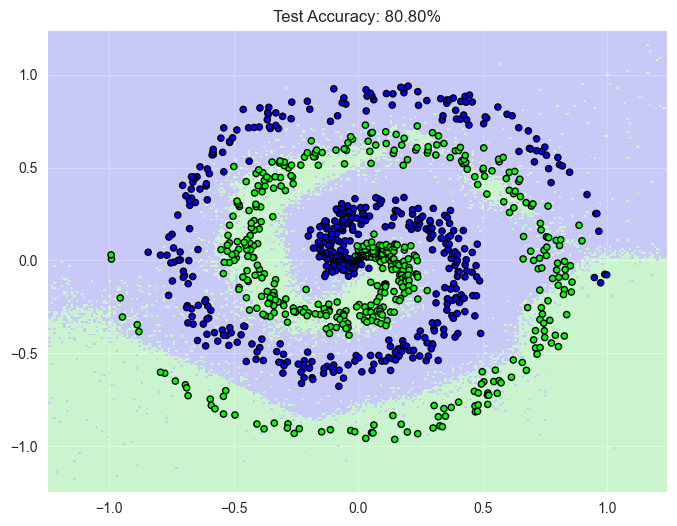

In [22]:
x_test, y_test = nnfs.datasets.spiral_data(samples=500, classes=2)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = (grid_outputs > 0.5).astype(int).reshape(xx.shape)

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

y_test = y_test.reshape(-1, 1)
accuracy = model.evaluate(x_test, y_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Test Accuracy: {accuracy:.2f}%')
plt.show()

In [19]:
x, y = nnfs.datasets.spiral_data(500, classes=3)

model = NeuralNetwork([
    DenseLayer(2, 64, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4),
    DropoutLayer(rate=0.01),
    DenseLayer(64, 32, activation='Relu'),
    DropoutLayer(rate=0.01),
    DenseLayer(32, 3, activation='Softmax')
])

model.set(
    loss='CategoricalCrossentropy',
    optimizer=Adam(decay=5e-7)
)

model.train(x, y, epochs=2000)

epoch: 0, loss: 1.099, acc: 33.40%, lr: 0.0010000000
epoch: 100, loss: 1.076, acc: 41.93%, lr: 0.0009999505
epoch: 200, loss: 1.064, acc: 42.07%, lr: 0.0009999005
epoch: 300, loss: 1.022, acc: 45.67%, lr: 0.0009998505
epoch: 400, loss: 0.950, acc: 55.33%, lr: 0.0009998005
epoch: 500, loss: 0.885, acc: 60.67%, lr: 0.0009997506
epoch: 600, loss: 0.846, acc: 62.87%, lr: 0.0009997006
epoch: 700, loss: 0.823, acc: 62.73%, lr: 0.0009996506
epoch: 800, loss: 0.806, acc: 65.93%, lr: 0.0009996007
epoch: 900, loss: 0.784, acc: 66.80%, lr: 0.0009995507
epoch: 1000, loss: 0.763, acc: 66.07%, lr: 0.0009995007
epoch: 1100, loss: 0.760, acc: 66.40%, lr: 0.0009994508
epoch: 1200, loss: 0.754, acc: 69.20%, lr: 0.0009994009
epoch: 1300, loss: 0.736, acc: 68.40%, lr: 0.0009993509
epoch: 1400, loss: 0.728, acc: 69.53%, lr: 0.0009993010
epoch: 1500, loss: 0.730, acc: 71.60%, lr: 0.0009992511
epoch: 1600, loss: 0.694, acc: 74.00%, lr: 0.0009992011
epoch: 1700, loss: 0.704, acc: 74.33%, lr: 0.0009991512
epoc

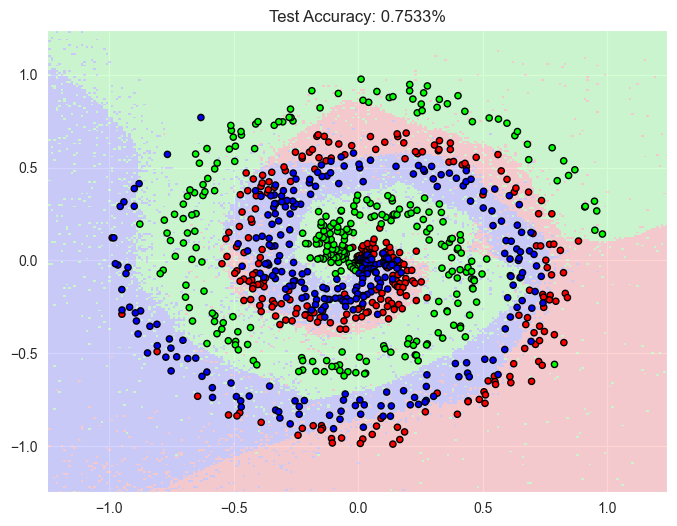

In [20]:
x_test, y_test = nnfs.datasets.spiral_data(samples=300, classes=3)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = np.argmax(grid_outputs, axis=1)
z = z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

predictions = np.argmax(outputs, axis=1)
accuracy = np.mean(predictions == y_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Test Accuracy: {accuracy:.4f}%')
plt.show()